# SyNG-BTS v3.2 — Example Usage

This notebook demonstrates the **SyNG-BTS API** for synthetic bulk transcriptomic data generation and evaluation. It covers:
1. **Sample Generation**: Generating synthetic data by training on real data.
2. **Evaluation**: Comparing generated data to real data using various metrics and visualizations.
3. **Pilot Study**: Assessing model performance across different pilot sizes.
4. **Transfer Learning**: Adapting a model trained on one dataset to generate data for another dataset.


## 1. Setup & Imports

In [1]:
import syng_bts
from syng_bts import (
    generate,
    pilot_study,
    transfer,
    resolve_data,
    list_bundled_datasets,
    SyngResult,
    PilotResult,
    heatmap_eval,
    UMAP_eval,
    evaluation,
)

print(f"SyNG-BTS version: {syng_bts.__version__}")

SyNG-BTS version: 3.2.0


## 2. Browse Bundled Datasets

SyNG-BTS ships with several TCGA datasets. Use `list_bundled_datasets()` to see what's available.

In **v3.1**, `resolve_data()` returns a tuple `(DataFrame, groups_or_none)`:
- **DataFrame**: feature-only numeric data (no metadata columns)
- **groups**: `pd.Series` of group labels (if available for bundled dataset), or `None`

**Key principle**: Group labels are always passed explicitly via the `groups=` parameter to any experiment function — never embedded in the DataFrame.

In [2]:
# List all bundled datasets
datasets = list_bundled_datasets()
print("Available datasets:")
for name in datasets:
    print(f"  - {name}")

Available datasets:
  - SKCMPositive_4
  - BRCA
  - PRAD
  - BRCASubtypeSel
  - BRCASubtypeSel_test
  - BRCASubtypeSel_train
  - LIHCSubtypeFamInd
  - LIHCSubtypeFamInd_DESeq
  - LIHCSubtypeFamInd_test74
  - LIHCSubtypeFamInd_test74_DESeq
  - LIHCSubtypeFamInd_train294
  - LIHCSubtypeFamInd_train294_DESeq


In [3]:
# Load a bundled dataset as a DataFrame
# In v3.1, resolve_data() returns (DataFrame, groups_or_none)
data, groups = resolve_data("SKCMPositive_4")
print(f"Shape: {data.shape}")
print(f"Groups: {groups}")
data.head()

Shape: (452, 298)
Groups: None


hsa.let.7a.1  hsa.let.7a.2  hsa.let.7a.3  \
samples                                                                  
TCGA.EB.A41B.01A.11R.A24Y.13         46524         46694         46175   
TCGA.WE.A8ZQ.06A.41R.A37G.13        261850        263181        263220   
TCGA.BF.A3DN.01A.11R.A20E.13         66468         66916         67426   
TCGA.D3.A51T.06A.11R.A25Z.13         52116         52739         52943   
TCGA.EE.A20F.06A.21R.A18V.13        100237        100559        100188   

                              hsa.let.7b  hsa.let.7c  hsa.let.7d  hsa.let.7e  \
samples                                                                        
TCGA.EB.A41B.01A.11R.A24Y.13       37103       12054        5189        4839   
TCGA.WE.A8ZQ.06A.41R.A37G.13      116984       70018       12925       56860   
TCGA.BF.A3DN.01A.11R.A20E.13      127044        1698        2502       14698   
TCGA.D3.A51T.06A.11R.A25Z.13       66877         581        2531       10654   
TCGA.EE.A20F.06A.21R.A18V.13       84655        1095       11967       18860   

                              hsa.let.7f.1  hsa.let.7f.2  hsa.let.7g  ...  \
samples                                                               ...   
TCGA.EB.A41B.01A.11R.A24Y.13         13910         13925        3001  ...   
TCGA.WE.A8ZQ.06A.41R.A37G.13        161729        164786       13164  ...   
TCGA.BF.A3DN.01A.11R.A20E.13         16129         16598        2350  ...   
TCGA.D3.A51T.06A.11R.A25Z.13         18552         18978        2927  ...   
TCGA.EE.A20F.06A.21R.A18V.13         41909         41734        6914  ...   

                              hsa.mir.92a.1  hsa.mir.92a.2  hsa.mir.92b  \
samples                                                                   
TCGA.EB.A41B.01A.11R.A24Y.13         198311         179487          273   
TCGA.WE.A8ZQ.06A.41R.A37G.13         208687         173787         2770   
TCGA.BF.A3DN.01A.11R.A20E.13          27311          25715          373   
TCGA.D3.A51T.06A.11R.A25Z.13         107366          96697          425   
TCGA.EE.A20F.06A.21R.A18V.13          76059          70886          462   

                              hsa.mir.93  hsa.mir.937  hsa.mir.940  \
samples                                                              
TCGA.EB.A41B.01A.11R.A24Y.13       44574           10           20   
TCGA.WE.A8ZQ.06A.41R.A37G.13      225845           65          143   
TCGA.BF.A3DN.01A.11R.A20E.13       13138            5           35   
TCGA.D3.A51T.06A.11R.A25Z.13       65557            5           11   
TCGA.EE.A20F.06A.21R.A18V.13       70487           49           80   

                              hsa.mir.942  hsa.mir.98  hsa.mir.99a  \
samples                                                              
TCGA.EB.A41B.01A.11R.A24Y.13           48         259         2274   
TCGA.WE.A8ZQ.06A.41R.A37G.13           66        1587        12047   
TCGA.BF.A3DN.01A.11R.A20E.13           26         270          226   
TCGA.D3.A51T.06A.11R.A25Z.13           34         387           73   
TCGA.EE.A20F.06A.21R.A18V.13          154         647          227   

                              hsa.mir.99b  
samples                                    
TCGA.EB.A41B.01A.11R.A24Y.13       136581  
TCGA.WE.A8ZQ.06A.41R.A37G.13       678844  
TCGA.BF.A3DN.01A.11R.A20E.13       275277  
TCGA.D3.A51T.06A.11R.A25Z.13       177271  
TCGA.EE.A20F.06A.21R.A18V.13       417129  

[5 rows x 298 columns]

## 3. Generate Synthetic Data

The `generate()` function trains a generative model on your data and returns a `SyngResult` object containing synthetic samples, training loss, metadata, and **original input data**.

In **v3.1**, group labels are passed explicitly via the `groups=` parameter (merged from the `resolve_data()` tuple).

We use `epoch=3000` here with `early_stop_patience=20` for balance between speed and convergence.

### Early Stopping & Epoch Control

The `epoch` and `early_stop_patience` parameters control training duration:

| `epoch` | `early_stop_patience` | Behaviour |
|---------|----------------------|-----------|
| `None` (default) | `None` | Early stopping ON, patience=30, max 1,000 epochs |
| `None` | `30` | Early stopping ON, patience=30, max 1,000 epochs |
| `500` | `None` | Early stopping OFF, run exactly 500 epochs |
| `500` | `30` | Early stopping ON with patience=30, max 500 epochs |

This is the same interaction in `generate()`, `pilot_study()`, and `transfer()`.

### Verbosity Levels

Three verbosity levels control output during training:
- **`"silent"` or `0`**: No training output
- **`"minimal"` or `1` (default)**: High-level summaries and early-stopping messages
- **`"detailed"` or `2`**: Per-epoch progress, loss values, and timings


In [4]:
# Generate synthetic data using a VAE with kl_weight=10
# Groups are passed explicitly via the groups= parameter
result = generate(
    data="SKCMPositive_4",
    groups=groups,  # None in this case; no groups for SKCMPositive_4
    apply_log=True,
    model="VAE1-10",
    new_size=1000,
    batch_frac=0.1,
    learning_rate=0.0005,
    epoch=3000,
    early_stop_patience=20,
    off_aug=None,
    AE_head_num=2,
    Gaussian_head_num=9,
    random_seed=42,
    verbose="minimal",
)
print(f"Result type: {type(result)}")
print(result.summary())

Starting training: 3000 epochs, loss=MSE, kl_weight=10, early_stop=20
Epoch  670/3000 |████░░░░░░░░░░░░░░░░| kl: 6.4551, recons: 1609.0966, val: 1639.61313475
Early stopping at epoch 650 (best val_loss: 1638.3701)
Training complete: 0.18min
Result type: <class 'syng_bts.result.SyngResult'>
Model: VAE1-10 | Generated data: 1000 samples × 298 features | Epochs trained: 670 | Final loss: kl=6.0171, recons=1578.6864 | Reconstructed data: 720 rows × 298 cols | Original data: 452 rows × 298 cols | Random seed: 42


## 4. Inspect the Result

`SyngResult` holds everything from the run: generated data (as a DataFrame with column names preserved), training loss, reconstructed data (for AE/VAE/CVAE), model state, metadata, and **original input data**.

**v3.1 feature**: `generated_data` is automatically returned in **count scale** (original domain) when `apply_log=True` was used during training.

In [5]:
data, _ = resolve_data("SKCMPositive_4")
# Generated data is a DataFrame with original column names
print(f"Generated data shape: {result.generated_data.shape}")
print(f"Original data preserved: {result.original_data is not None}")
print(f"Original data shape: {result.original_data.shape}")

# Print first 3x3 of generated data
print("\nFirst 3x3 of generated data:")
print(result.generated_data.iloc[:3, :3])

# Print first 3x3 of result.original_data
print("\nFirst 3x3 of original data:")
print(result.original_data.iloc[:3, :3])

# Print first 3x3 of result.reconstructed_data
print("\nFirst 3x3 of result.reconstructed_data:")
print(result.reconstructed_data.iloc[:3, :3])


Generated data shape: (1000, 298)
Original data preserved: True
Original data shape: (452, 298)

First 3x3 of generated data:
    hsa.let.7a.1   hsa.let.7a.2   hsa.let.7a.3
0   52249.308594   49248.515625   52422.257812
1   22619.712891   22957.232422   23648.951172
2  127738.804688  127682.921875  125756.320312

First 3x3 of original data:
                              hsa.let.7a.1  hsa.let.7a.2  hsa.let.7a.3
samples                                                               
TCGA.EB.A41B.01A.11R.A24Y.13         46524         46694         46175
TCGA.WE.A8ZQ.06A.41R.A37G.13        261850        263181        263220
TCGA.BF.A3DN.01A.11R.A20E.13         66468         66916         67426

First 3x3 of result.reconstructed_data:
    hsa.let.7a.1   hsa.let.7a.2   hsa.let.7a.3
0   58229.015625   58406.003906   59193.015625
1   32575.000000   32438.996094   32591.994141
2  193225.906250  194384.046875  194414.125000


In [6]:
# Training loss log
print(f"Loss columns: {result.loss.columns.tolist()}")
print(result.loss.head())
print(result.loss.tail())

Loss columns: ['kl', 'recons']
         kl        recons
0  0.601997  26637.810547
1  0.505048  26620.761719
2  0.708526  26600.710938
3  1.047627  26575.478516
4  1.391097  26542.613281
            kl       recons
5355  6.078173  1576.350220
5356  6.032572  1576.791992
5357  6.018315  1579.218384
5358  6.033247  1581.371826
5359  6.017068  1578.686401


In [7]:
# Metadata stores run parameters
for key, value in result.metadata.items():
    print(f"{key}: {value}")

model: VAE1-10
modelname: VAE
dataname: SKCMPositive_4
num_epochs: 3000
epochs_trained: 670
seed: 42
kl_weight: 10
input_shape: (452, 298)
early_stop: True
early_stop_patience: 20
generated_labels: None
reconstructed_labels: None
apply_log: True
arch_params: {'family': 'ae', 'modelname': 'VAE', 'num_features': 298, 'latent_size': 32}


### 4.1 Understanding Metadata & Result Structure

The `metadata` attribute stores comprehensive run information useful for reproducibility and documentation. Standard keys include:
- `model`: Model type (e.g., "VAE")
- `kl_weight`: KL divergence weight (VAE/CVAE only)
- `dataname`: Short name of the input dataset
- `epochs_trained`: Number of epochs run before early stopping
- `seed`: Random seed used
- `input_shape`: Tuple of (n_samples, n_features)
- `arch_params`: Architecture-specific parameters for model reconstruction
- `apply_log`: Whether log2 preprocessing was applied
- `early_stop`: Whether early stopping was enabled
- `early_stop_patience`: Patience value if early stopping was enabled


In [8]:
# Human-readable summary
print(result.summary())

Model: VAE1-10 | Generated data: 1000 samples × 298 features | Epochs trained: 670 | Final loss: kl=6.0171, recons=1578.6864 | Reconstructed data: 720 rows × 298 cols | Original data: 452 rows × 298 cols | Random seed: 42


## 5. Plotting & Visualization

`SyngResult` has built-in plotting methods that return `matplotlib.Figure` objects (never call `plt.show()` themselves — you control display). This section covers the three main visualization tools.

### 5.1 Plotting Training Loss

The `plot_loss()` method produces rich loss curves with configurable axes and running-average overlays.

**Parameters:**
- **`running_average_window`** (default: 25): Smoothing window size. Larger values produce smoother curves; larger windows reduce per-epoch noise.
- **`x_axis`** (default: `"epochs"`):
  - `"epochs"`: X-axis shows epoch numbers (requires `metadata["epochs_trained"]` to be set)
  - `"iterations"`: X-axis shows iteration/minibatch numbers (useful for large datasets where per-iteration granularity matters)

**Return value:** Dictionary mapping loss column name → `matplotlib.Figure` (one figure per loss column, e.g., `"kl"`, `"recons"` for VAE).

**Example usage:**

Loss columns: ['kl', 'recons']
Displaying loss figure for column: kl


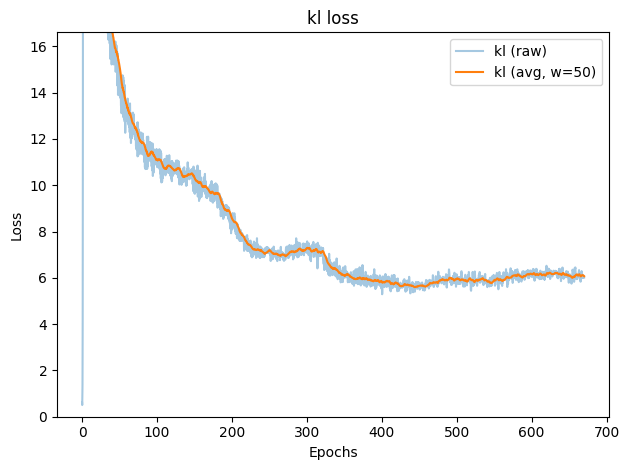

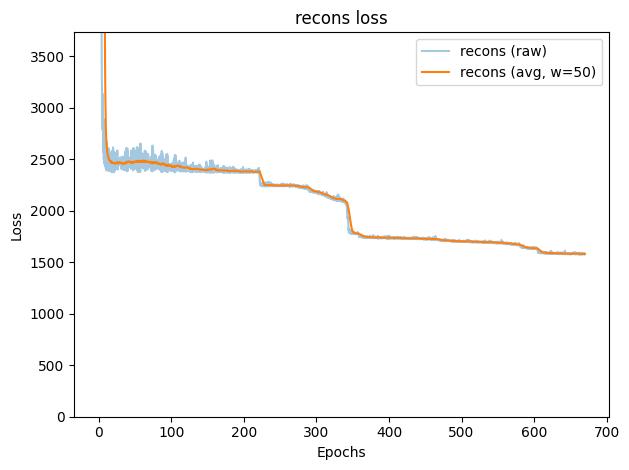

Displaying loss figure for column: recons


In [ ]:
import matplotlib.pyplot as plt

# Plot training loss with running average, epoch x-axis
figs = result.plot_loss(running_average_window=50, x_axis="epochs")
print(f"Loss columns: {list(figs.keys())}")
for col, fig in figs.items():
    plt.show()

# Alternative: iteration-based x-axis (useful for very long training)
# figs_iter = result.plot_loss(running_average_window=50, x_axis="iterations")
# for col, fig in figs_iter.items():
#     plt.show()

### 5.2 Plotting Data Distributions with Heatmaps

The `plot_heatmap()` method visualizes count distributions via seaborn heatmaps. It supports log2 scaling to make wide-ranging values more readable.

**Parameters:**
- **`which`** (default: `"generated"`): Which dataset to plot
  - `"generated"`: Synthetic samples from the trained model
  - `"reconstructed"`: Reconstructed originals (AE/VAE/CVAE only; raises ValueError if unavailable)
  - `"original"`: Original input data (raises ValueError if not included in result)
- **`log_scale`** (default: `True`): Apply `log2(x + 1)` transformation before plotting
  - Compresses wide-ranging values (essential for gene expression data with values from 0 to millions)
  - Makes subtle patterns visually apparent
  - Aligns with `apply_log=True` preprocessing used during training
  - Figure title includes `"(log2)"` when enabled

**Return value:** Single `matplotlib.Figure` object (not a dict like `plot_loss()`).

**Example usage:**

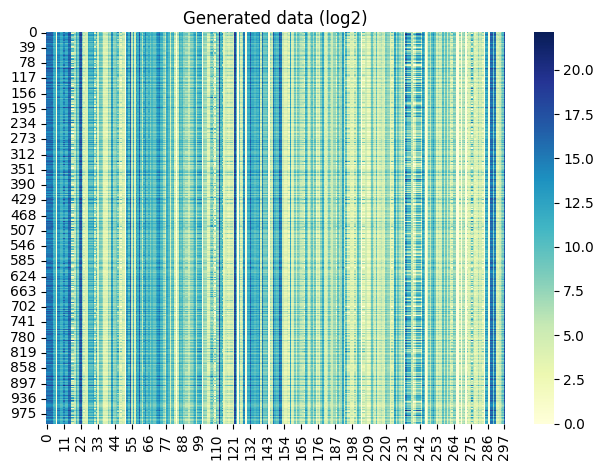

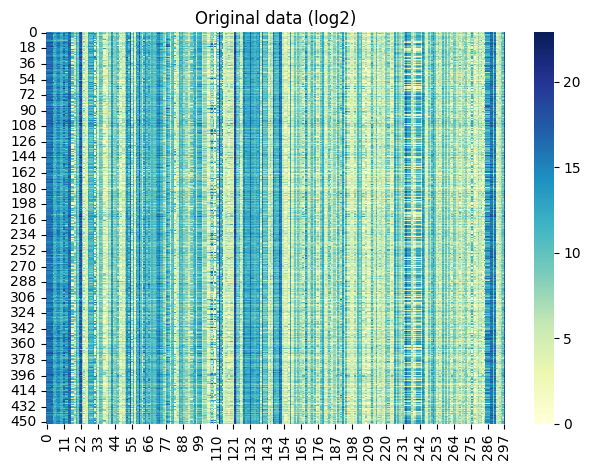

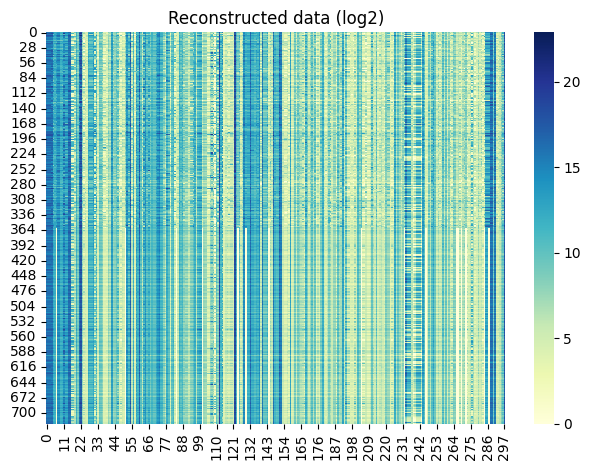

In [10]:
# Heatmap of generated synthetic data (log2 scaling)
fig_gen = result.plot_heatmap(which="generated", log_scale=True)
plt.show()

# Heatmap of original data (for comparison)
fig_orig = result.plot_heatmap(which="original", log_scale=True)
plt.show()

# Heatmap of reconstructed data (AE/VAE/CVAE models only)
if result.reconstructed_data is not None:
    fig_recon = result.plot_heatmap(which="reconstructed", log_scale=True)
    plt.show()
else:
    print("No reconstructed data (available only for AE/VAE/CVAE models).")

# Try without log scaling for comparison (rarely useful, but possible)
# fig_nolog = result.plot_heatmap(which="generated", log_scale=False)
# plt.show()

## 6 Generating Additional Samples Post-Training

After model training completes, you can generate **additional** synthetic samples without retraining using `generate_new_samples()`.

**Parameters:**
- **`n`** (required): Number of new samples to generate (must be a positive integer)
- **`mode`** (default: `"new"`): How to handle the new samples
  - `"new"`: Return a **new** `SyngResult` with **only** the new samples (no previously generated samples). Loss and metadata are copied from the original result.
  - `"append"`: **Add** new samples to existing `generated_data`. Returns the modified result in-place.
  - `"overwrite"`: **Replace** `generated_data` with entirely new samples. Returns the modified result in-place.

**Return value:** New or modified `SyngResult` object with updated `generated_data`.

**Key benefit:** Reuses the trained model state (from `model_state` dict); no retraining required. Useful for pilot studies that need variable sample counts from a single trained model.

**Example usage:**

In [ ]:
# Generate additional samples from the trained model (all 3 modes)

# Mode 1: "new" — Return a new SyngResult with ONLY the new samples
new_samples_result = result.generate_new_samples(n=200, mode="new")
print(f"Mode 'new': {new_samples_result.generated_data.shape}")
print("  → New SyngResult with 200 samples, same metadata & loss")

# Mode 2: "append" — Add new samples to the existing generated_data
extended_result = result.generate_new_samples(n=300, mode="append")
print(f"\nMode 'append': {extended_result.generated_data.shape}")
print(f"  → Extended from 1000 to {extended_result.generated_data.shape[0]} samples")

# Mode 3: "overwrite" — Replace all generated_data with new samples
replaced_result = result.generate_new_samples(n=1500, mode="overwrite")
print(f"\nMode 'overwrite': {replaced_result.generated_data.shape}")
print(f"  → Replaced with {replaced_result.generated_data.shape[0]} brand new samples")

Mode 'new': (200, 298)
  → New SyngResult with 200 samples, same metadata & loss

Mode 'append': (1300, 298)
  → Extended from 1000 to 1300 samples

Mode 'overwrite': (1500, 298)
  → Replaced with 1500 brand new samples


## 7. Save Results to Disk

Call `.save(output_dir)` to write generated data, loss, reconstructed data, and model state to disk. Returns a dict mapping output type to file path. Then use `.load(filepath)` to read it back into a `SyngResult` object.

In [12]:
import tempfile, os

# Save to a temporary directory for this demo
with tempfile.TemporaryDirectory() as tmpdir:
    print("Summary before saving:")
    print(result.summary())
    saved_files = result.save(tmpdir)
    print("Saved files:")
    for key, path in saved_files.items():
        size = os.path.getsize(path)
        print(f"  {key}: {os.path.basename(str(path))} ({size:,} bytes)")

    loaded = SyngResult.load(tmpdir)
    print("\nLoaded result:")
    print(loaded.summary())

Summary before saving:
Model: VAE1-10 | Generated data: 1500 samples × 298 features | Epochs trained: 670 | Final loss: kl=6.0171, recons=1578.6864 | Reconstructed data: 720 rows × 298 cols | Original data: 452 rows × 298 cols | Random seed: 42
Saved files:
  generated: SKCMPositive_4_VAE1-10_generated.csv (4,178,225 bytes)
  loss: SKCMPositive_4_VAE1-10_loss.csv (190,749 bytes)
  reconstructed: SKCMPositive_4_VAE1-10_reconstructed.csv (1,930,054 bytes)
  original: SKCMPositive_4_VAE1-10_original.csv (570,994 bytes)
  model: SKCMPositive_4_VAE1-10_model.pt (974,693 bytes)
  metadata: SKCMPositive_4_VAE1-10_metadata.json (446 bytes)

Loaded result:
Model: VAE1-10 | Generated data: 1500 samples × 298 features | Epochs trained: 670 | Final loss: kl=6.0171, recons=1578.6864 | Reconstructed data: 720 rows × 298 cols | Original data: 452 rows × 298 cols | Random seed: 42


## 7. Pilot Study

`pilot_study()` sweeps over multiple pilot sizes with replicated random draws (5 per size by default). It returns a `PilotResult` containing a dict of `SyngResult` objects keyed by `(pilot_size, draw_index)`.

In [14]:
# Run a pilot study with pilot sizes 50 and 100 (n_draws=5 per size, configurable)
# In v3.1+, groups are passed explicitly via the groups parameter
pilot_result = pilot_study(
    data="SKCMPositive_4",
    groups=None,  # No groups for SKCMPositive_4
    pilot_size=[50, 100],
    n_draws=5,  # Number of replicated draws per pilot size
    model="VAE1-10",
    epoch=1000,
    early_stop_patience=50,
    random_seed=42,
)
print(f"Result type: {type(pilot_result)}")
print(f"Number of runs: {len(pilot_result.runs)}")
print(f"Run keys (pilot_size, draw_index): {list(pilot_result.runs.keys())}")

[Pilot size 50] Draw 1/5 (training no. 1/10)
Starting training: 1000 epochs, loss=MSE, kl_weight=10, early_stop=50
Epoch    4/1000 |░░░░░░░░░░░░░░░░░░░░| kl: 119.3215, recons: 6149.9053, val: 9743.321003

Epoch  555/1000 |███████████░░░░░░░░░| kl: 4.5674, recons: 3553.1821, val: 3869.08310
Early stopping at epoch 505 (best val_loss: 3861.5105)
Training complete: 0.13min

[Pilot size 50] Draw 2/5 (training no. 2/10)
Starting training: 1000 epochs, loss=MSE, kl_weight=10, early_stop=50
Epoch  319/1000 |██████░░░░░░░░░░░░░░| kl: 7.3929, recons: 3290.4517, val: 2797.20508958
Early stopping at epoch 269 (best val_loss: 2779.2104)
Training complete: 0.07min

[Pilot size 50] Draw 3/5 (training no. 3/10)
Starting training: 1000 epochs, loss=MSE, kl_weight=10, early_stop=50
Epoch  542/1000 |██████████░░░░░░░░░░| kl: 4.7445, recons: 3068.5149, val: 3382.65690604
Early stopping at epoch 492 (best val_loss: 3362.1282)
Training complete: 0.12min

[Pilot size 50] Draw 4/5 (training no. 4/10)
Starting training: 1000 epochs, loss=MSE, kl_weight=10, early_stop=50
Epoch  529/1000 |██████████░░░░░░░░░░| kl: 5.1876, recons: 3637.1160, val: 3641.82941395
Early stopping at epoch 479 (best val_loss: 3623.3250

In [15]:
# Inspect individual runs
for key, run in pilot_result.runs.items():
    pilot_size, draw = key
    print(
        f"Pilot={pilot_size}, Draw={draw}: "
        f"generated={run.generated_data.shape}, "
        f"loss_rows={len(run.loss)}"
    )

Pilot=50, Draw=1: generated=(250, 298), loss_rows=4440
Pilot=50, Draw=2: generated=(250, 298), loss_rows=2552
Pilot=50, Draw=3: generated=(250, 298), loss_rows=4336
Pilot=50, Draw=4: generated=(250, 298), loss_rows=4232
Pilot=50, Draw=5: generated=(250, 298), loss_rows=7384
Pilot=100, Draw=1: generated=(500, 298), loss_rows=2848
Pilot=100, Draw=2: generated=(500, 298), loss_rows=8000
Pilot=100, Draw=3: generated=(500, 298), loss_rows=8000
Pilot=100, Draw=4: generated=(500, 298), loss_rows=8000
Pilot=100, Draw=5: generated=(500, 298), loss_rows=7216


In [16]:
# Aggregate summary across all runs
# PilotResult provides .summary() to show aggregate statistics across all draws
print(pilot_result.summary())

PilotResult: 10 runs
Model: VAE1-10
Pilot sizes: [50, 100]
Original data: 452 rows × 298 cols
  pilot=50, draw=1: 250 generated, final loss: kl=4.6172, recons=3813.6616
  pilot=50, draw=2: 250 generated, final loss: kl=5.7356, recons=2761.8408
  pilot=50, draw=3: 250 generated, final loss: kl=5.0044, recons=3344.1812
  pilot=50, draw=4: 250 generated, final loss: kl=4.5178, recons=3613.3301
  pilot=50, draw=5: 250 generated, final loss: kl=6.9382, recons=2828.7168
  pilot=100, draw=1: 500 generated, final loss: kl=3.8948, recons=2944.0029
  pilot=100, draw=2: 500 generated, final loss: kl=4.9370, recons=1774.6664
  pilot=100, draw=3: 500 generated, final loss: kl=4.9843, recons=2529.2266
  pilot=100, draw=4: 500 generated, final loss: kl=4.6889, recons=2148.2820
  pilot=100, draw=5: 500 generated, final loss: kl=5.6129, recons=1665.0354


### 7.1 Visualizing Pilot Study Results

`PilotResult` provides flexible visualization of training loss across multiple runs. You can view per-run loss curves or aggregated loss curves across all runs.


Per-run figures: 10 runs
Runs plotted: [(50, 1), (50, 2), (50, 3)]...


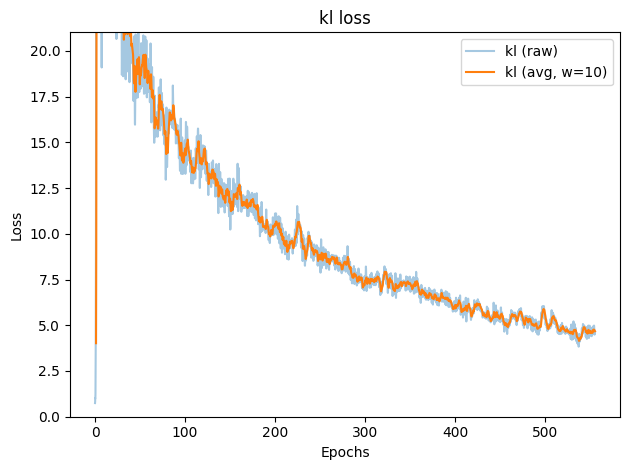

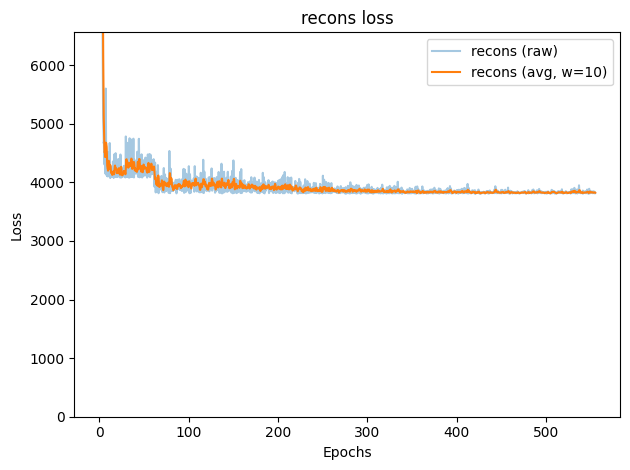

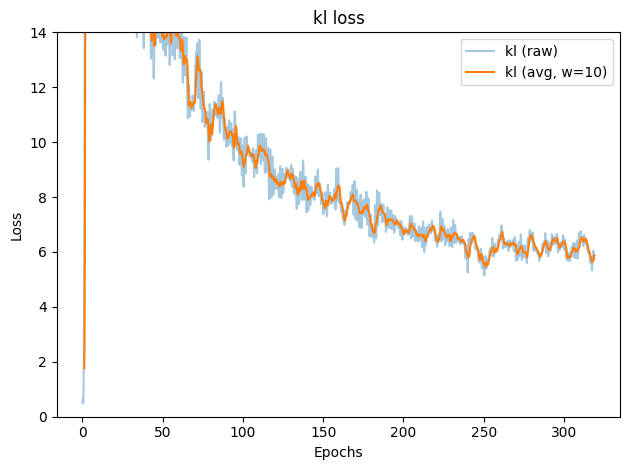

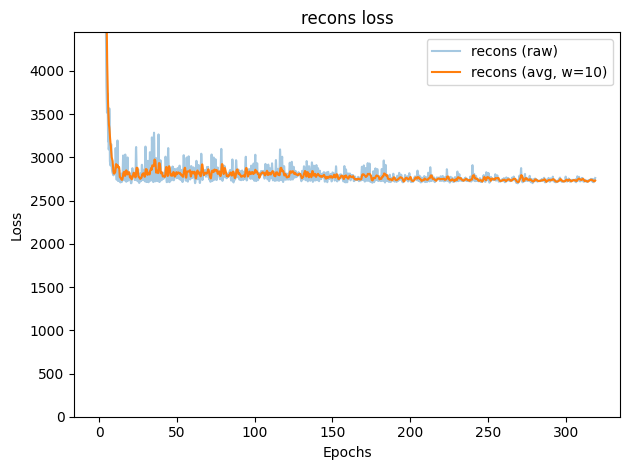

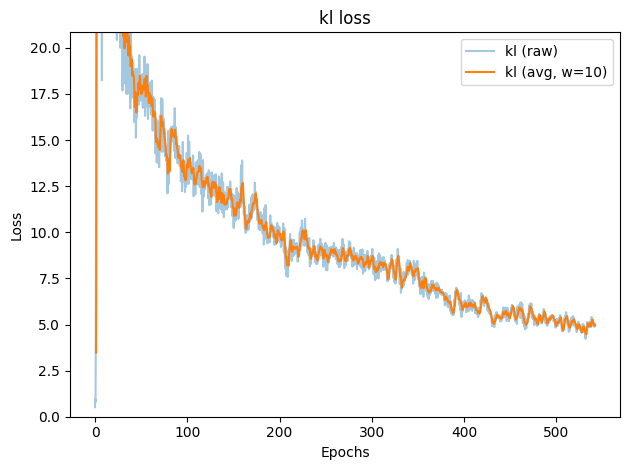

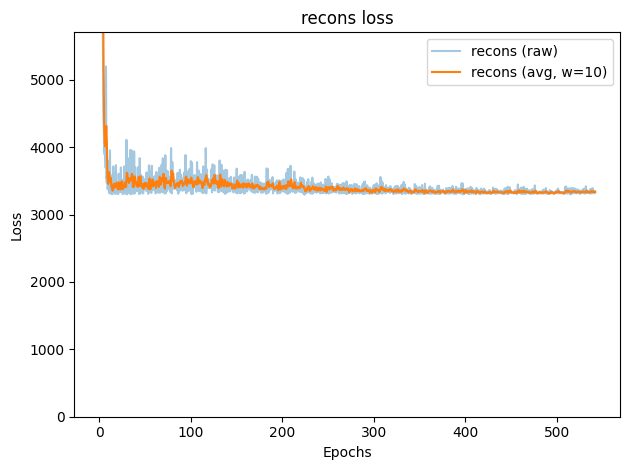

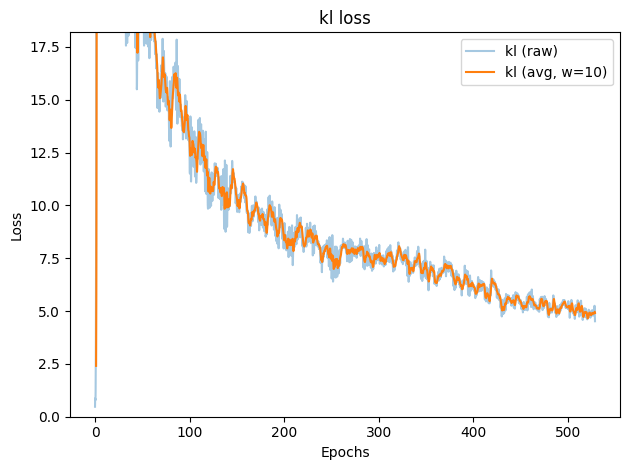

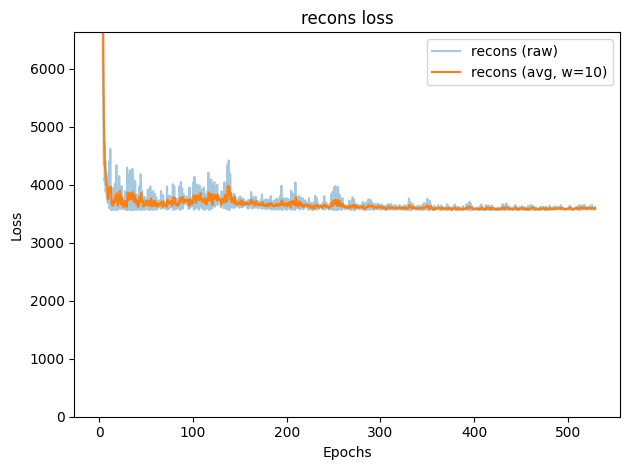

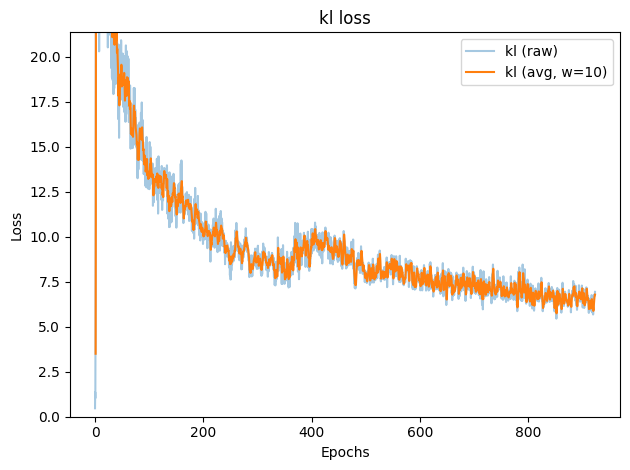

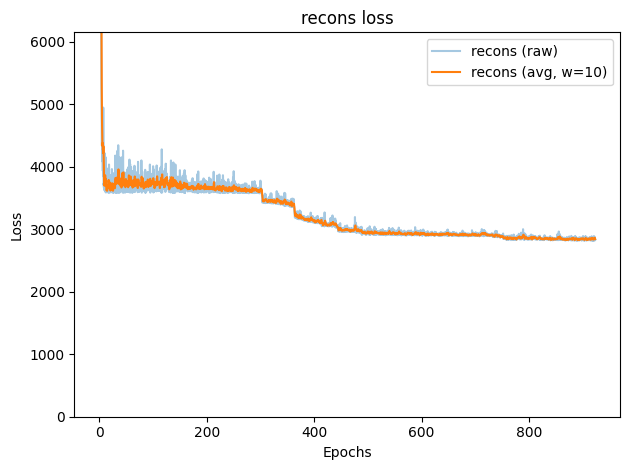

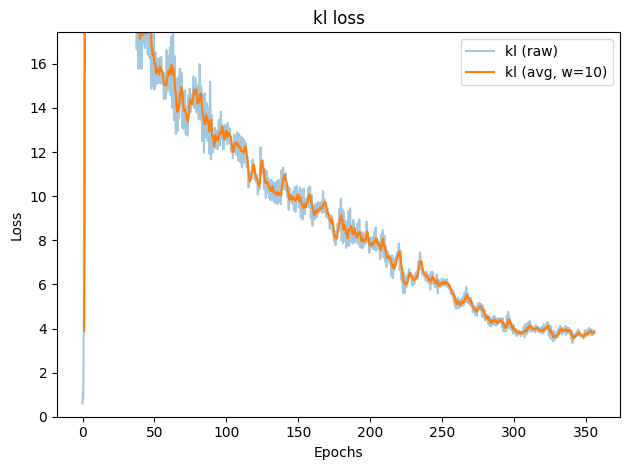

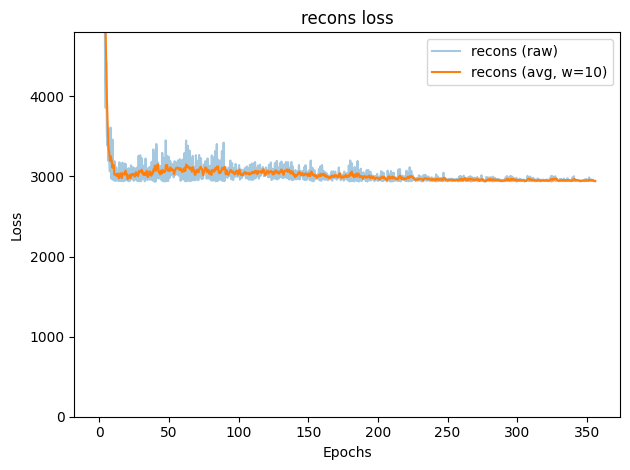

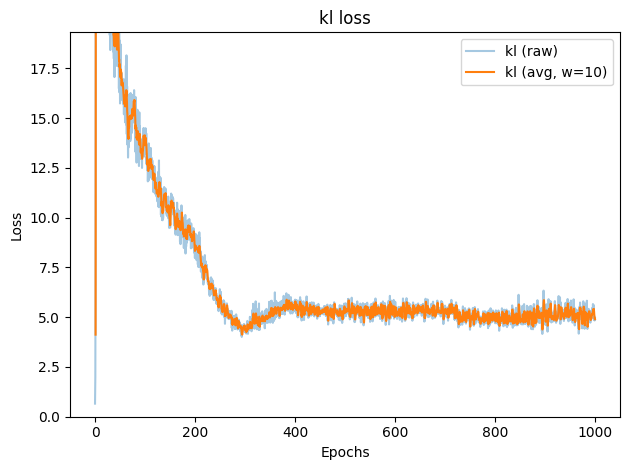

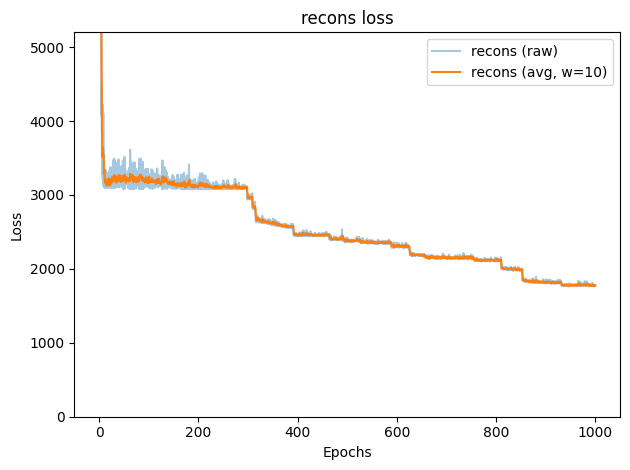

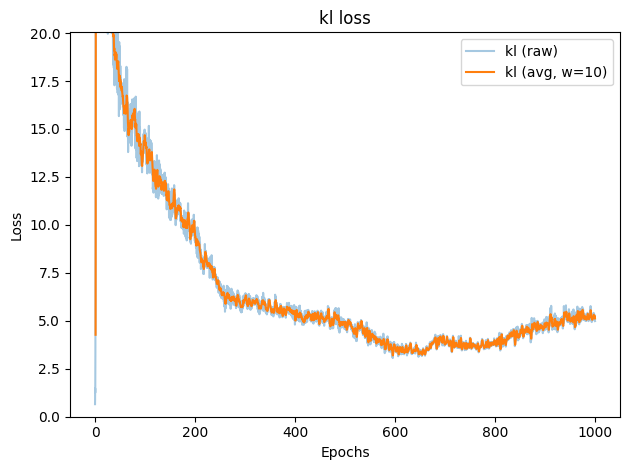

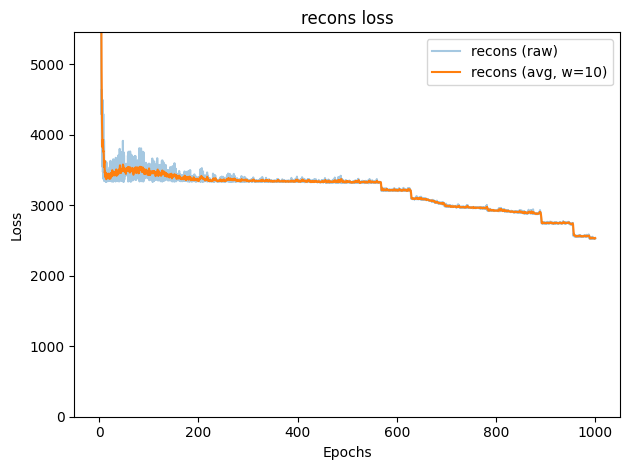

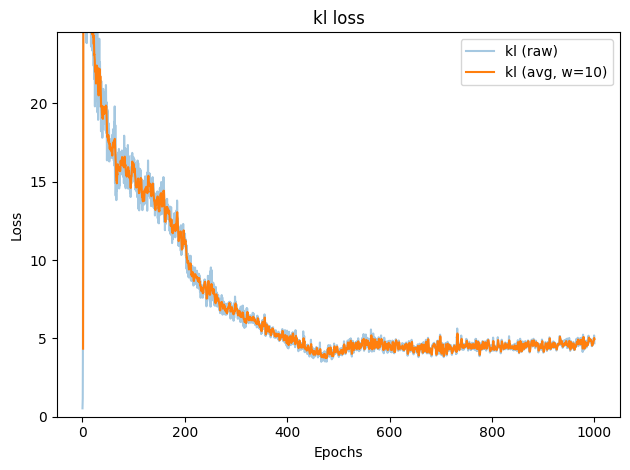

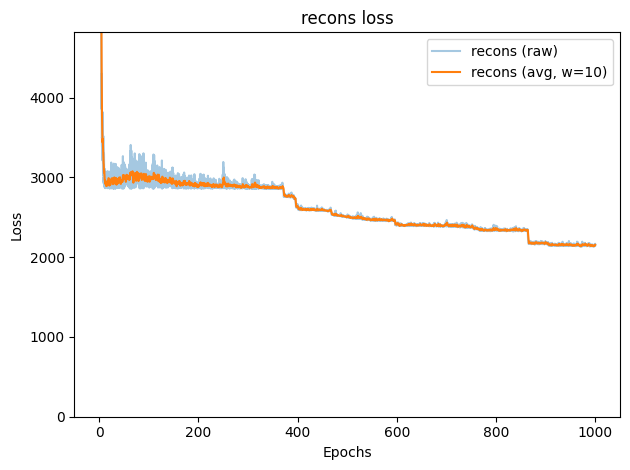

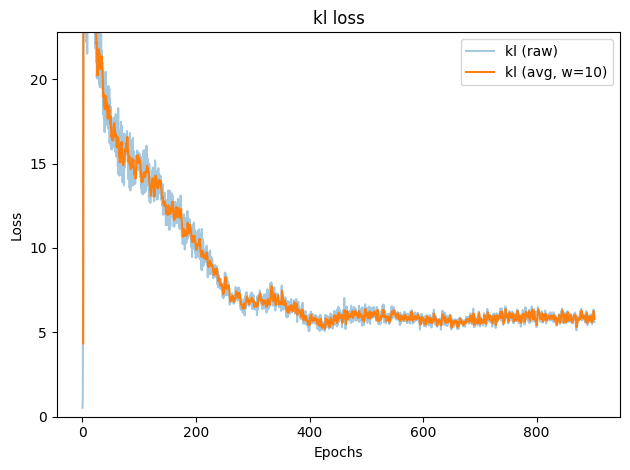

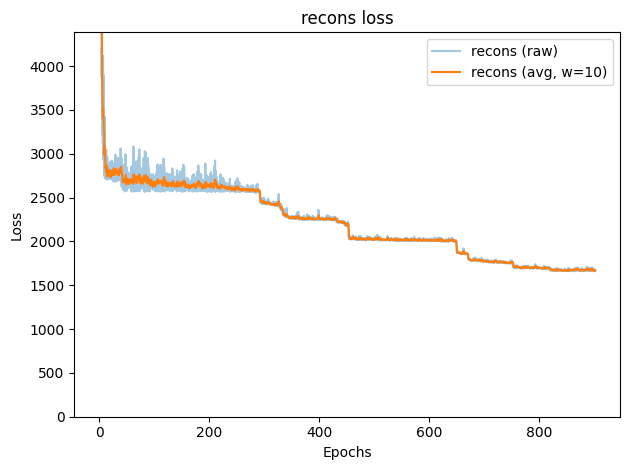


Aggregate figures (one per loss column): 2


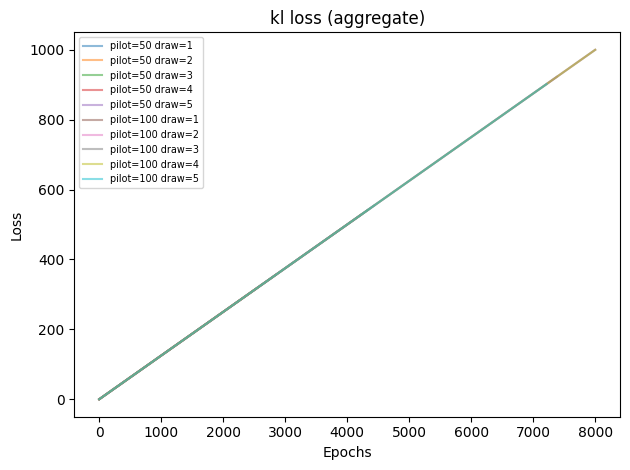

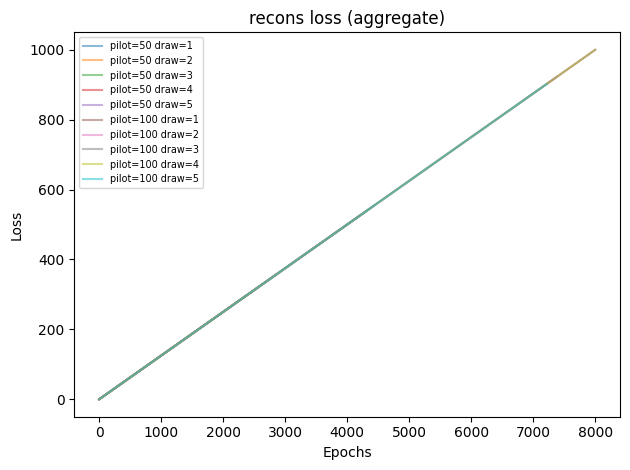

In [17]:
# Plot training loss from pilot study in two ways:

# Mode 1: Per-run loss curves (dict of dicts: one figure per run)
per_run_figs = pilot_result.plot_loss(aggregate=False, running_average_window=10)
print(f"Per-run figures: {len(per_run_figs)} runs")
print(f"Runs plotted: {list(per_run_figs.keys())[:3]}...")  # Show first 3 runs
# Display first run's loss
if per_run_figs:
    first_run_figs = next(iter(per_run_figs.values()))
    for col, fig in first_run_figs.items():
        plt.show()
        break

# Mode 2: Aggregate loss curves (one figure per loss column, averaged across all runs)
aggregate_figs = pilot_result.plot_loss(aggregate=True, running_average_window=10)
print(f"\nAggregate figures (one per loss column): {len(aggregate_figs)}")
for col, fig in aggregate_figs.items():
    plt.show()

## 8. Transfer Learning

`transfer()` pre-trains a model on a source dataset and fine-tunes on a target dataset. Useful when the target dataset is very small.

In [18]:
# Transfer from PRAD to BRCA using a MAF model
# Pre-train on PRAD (500 samples), then fine-tune and generate on BRCA
transfer_result = transfer(
    source_data="PRAD",
    target_data="BRCA",
    source_groups=None,  # No groups for PRAD/BRCA bundled datasets
    target_groups=None,
    new_size=500,
    model="maf",
    epoch=500,
    early_stop_patience=50,
    random_seed=42,
    verbose="minimal",
)
print(f"Result type: {type(transfer_result)}")
print(f"Generated data shape: {transfer_result.generated_data.shape}")
print(transfer_result.summary())

Starting training: 500 epochs, model=maf, num_blocks=5, lr=0.0005, early_stop=50
Epoch 377/500 |███████████████░░░░░| neg_loglik: -225.0756
Early stopping at epoch 328 (best log-likelihood: 226.5972)
Training complete: 9.21min
Starting training: 500 epochs, model=maf, num_blocks=5, lr=0.0005, early_stop=50
Epoch  72/500 |██░░░░░░░░░░░░░░░░░░| neg_loglik: -56.3101
Early stopping at epoch 23 (best log-likelihood: 56.4235)
Training complete: 2.25min
Result type: <class 'syng_bts.result.SyngResult'>
Generated data shape: (500, 1881)
Model: maf | Generated data: 500 samples × 1881 features | Epochs trained: 73 | Final loss: train_loss=-56.6186 | Original data: 1207 rows × 1881 cols | Random seed: 42


Transfer Result Summary:
Model: maf | Generated data: 500 samples × 1881 features | Epochs trained: 73 | Final loss: train_loss=-56.6186 | Original data: 1207 rows × 1881 cols | Random seed: 42


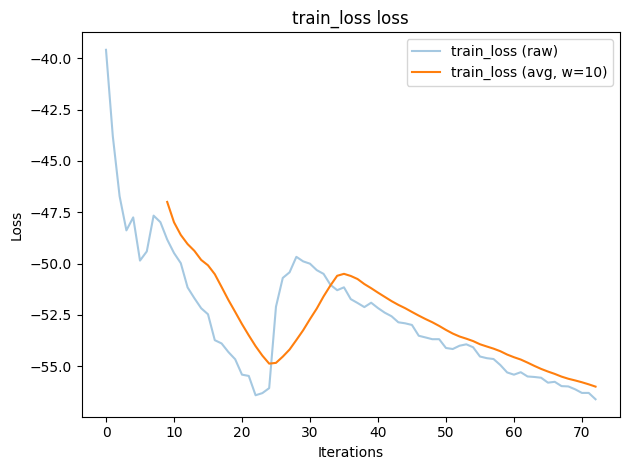

/Users/yannick/GoogleDrive/projects/SyNG-BTS/syng_bts/result.py:527: RuntimeWarning: divide by zero encountered in log2
  data = np.log2(data + 1)


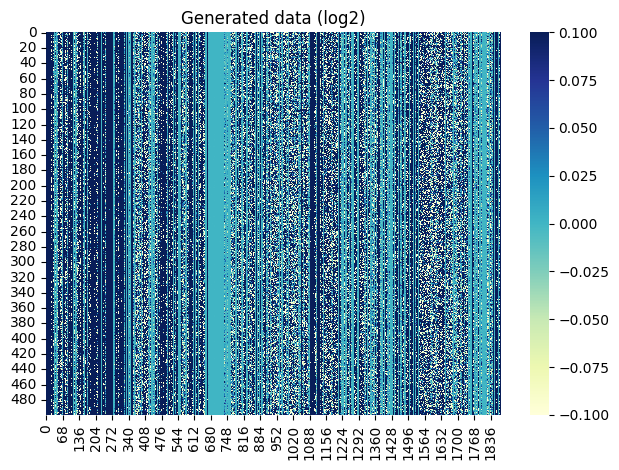

In [24]:
# Examine the transfer learning result in more detail
print("Transfer Result Summary:")
print(transfer_result.summary())

# Plot training loss with proper x-axis
# You can choose x_axis="iterations" for iteration-based, or "epochs" for epoch-based
import matplotlib.pyplot as plt

figs_loss = transfer_result.plot_loss(running_average_window=10, x_axis="iterations")
for col, fig in figs_loss.items():
    plt.show()

# Plot heatmap of generated data with log scaling
fig_heatmap = transfer_result.plot_heatmap(which="generated", log_scale=True)
plt.show()

## 9. Evaluation

Evaluate synthetic data quality by comparing real and generated distributions using the `evaluation()` function or standalone plotting utilities.

In **v3.1**, evaluate function parameters are explicit:
- `real_data` and `generated_data` accept DataFrames or file paths
- `real_groups` and `generated_groups` are passed explicitly (merged from `resolve_data()` tuples)
- When `apply_log=True`, both real and generated data are log-transformed before comparison (to ensure apples-to-apples comparison in log space)

Functions return `dict[str, Figure]` objects — never call `plt.show()` themselves.

/Users/yannick/GoogleDrive/projects/SyNG-BTS/.venv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Evaluation metrics computed: ['heatmap', 'umap']


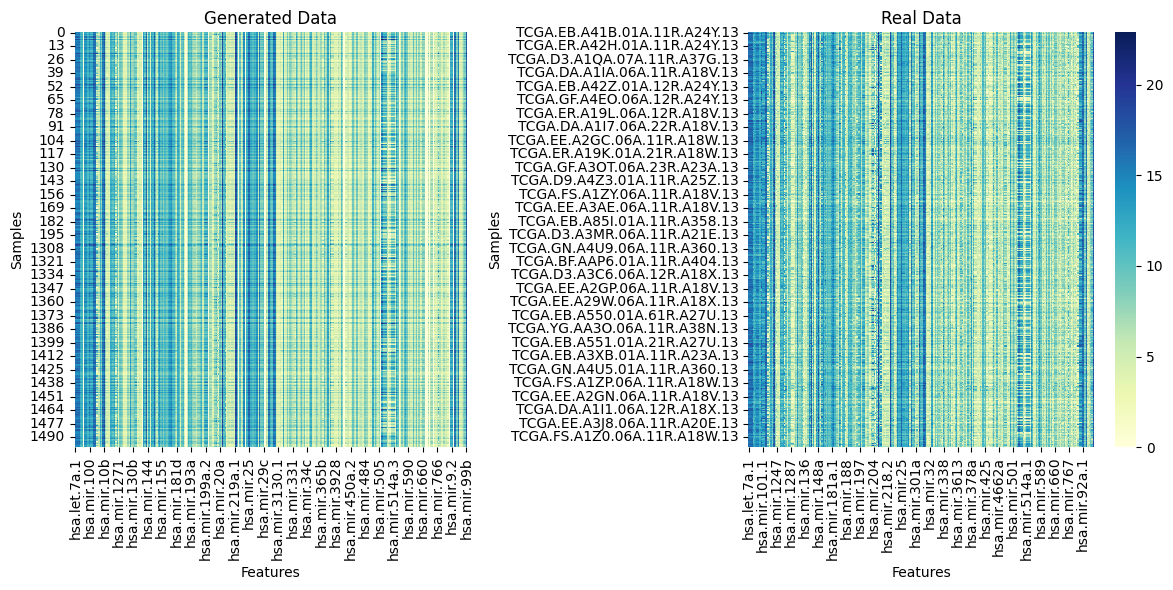

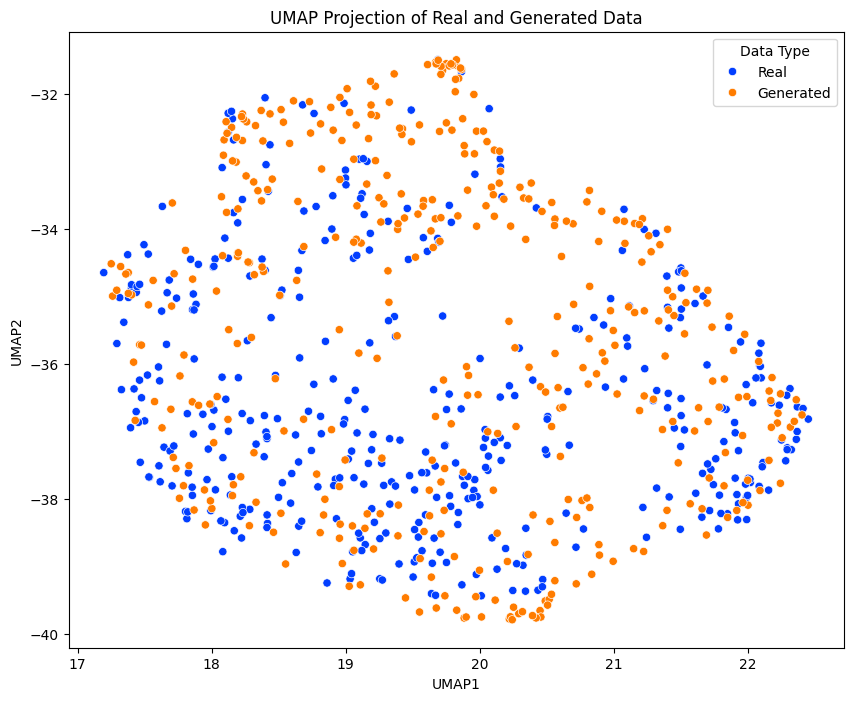

In [20]:
import matplotlib.pyplot as plt

# Comprehensive evaluation using the evaluation() function
# In v3.1+, data is unpacked via tuple unpacking from resolve_data()
real_data, real_groups = resolve_data("SKCMPositive_4")

figs = evaluation(
    real_data=real_data,
    generated_data=result.generated_data,
    real_groups=real_groups,  # None for SKCMPositive_4 (no groups)
    generated_groups=None,
    apply_log=True,  # Apply log transform for fair comparison with log-preprocessed data
)

# evaluation() returns a dict of Figure objects keyed by metric name
print(f"Evaluation metrics computed: {list(figs.keys())}")

# Display the figures (showing first 2 metrics for brevity)
for metric_name, fig in list(figs.items())[:2]:
    plt.show()

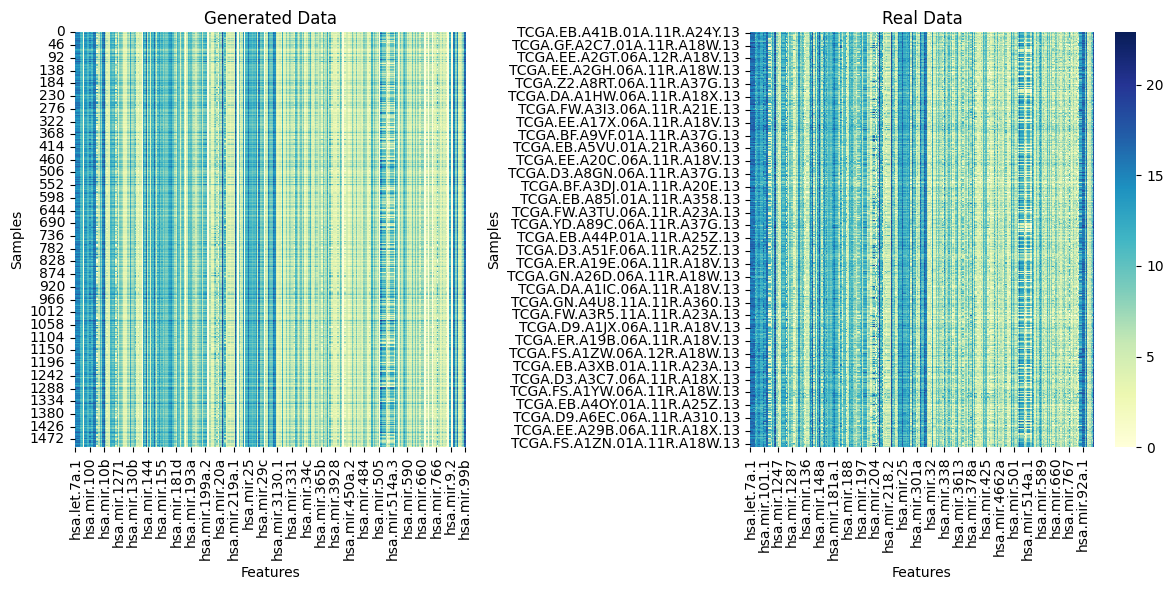

In [21]:
import matplotlib.pyplot as plt

# Standalone heatmap comparison: real vs generated
real_data, _ = resolve_data("SKCMPositive_4")
fig = heatmap_eval(real_data, result.generated_data)
plt.show()

/Users/yannick/GoogleDrive/projects/SyNG-BTS/.venv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


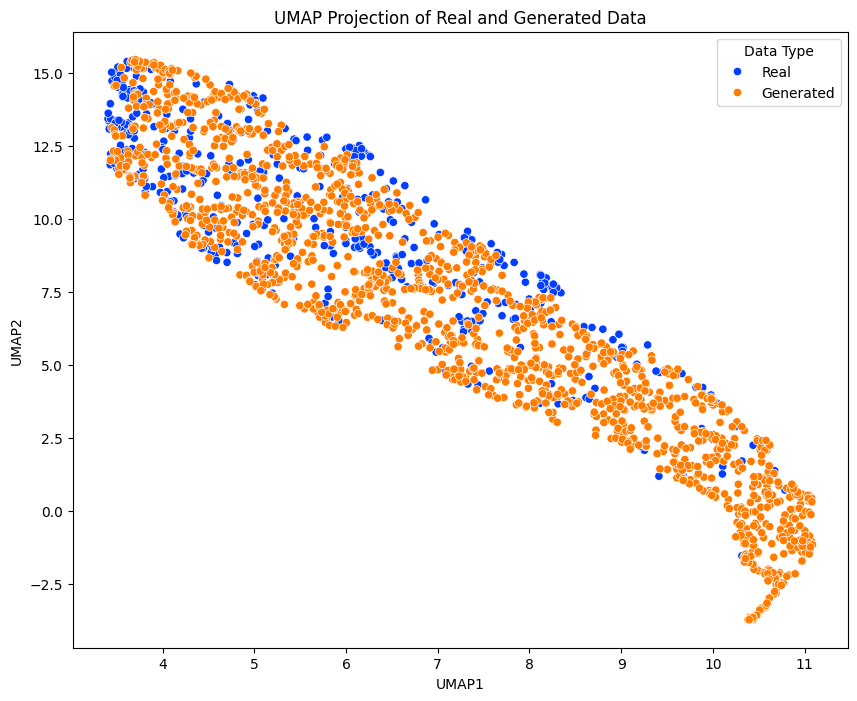

In [22]:
# UMAP projection: overlay real and generated
real_data, _ = resolve_data("SKCMPositive_4")
fig = UMAP_eval(real_data, result.generated_data, random_seed=42)
plt.show()

## 10 Working with Grouped Datasets

Some bundled datasets include group/class labels (e.g., `BRCASubtypeSel` with tumor subtypes, or `LIHCSubtypeFamInd` with family IDs). In **v3.1+**, groups are automatically loaded by `resolve_data()` and passed explicitly to experiment functions.

**When to use groups:**
- CVAE models can condition generation on group labels (e.g., generate synthetic data for each tumor subtype)
- Group information helps validate synthetic data quality per class
- Some evaluation metrics are group-aware

**Example: training with groups**

In [25]:
# Example with a grouped dataset (BRCASubtypeSel has tumor subtypes)
grouped_data, grouped_labels = resolve_data("BRCASubtypeSel")
print(f"Data shape: {grouped_data.shape}")

# Check if groups are available
if grouped_labels is not None:
    print(f"Groups available: Yes")
    print(f"Group types: {grouped_labels.unique().tolist()}")

    # Train with explicit group labels (CVAE will use them for conditional generation)
    grouped_result = generate(
        data=grouped_data,
        groups=grouped_labels,  # Explicit group labels for CVAE
        model="CVAE",
        new_size=500,
        epoch=100,
        early_stop_patience=20,
        random_seed=42,
    )

    print(f"\nGenerated data shape: {grouped_result.generated_data.shape}")
    print(f"Original data preserved: {grouped_result.original_data is not None}")
    print(f"\n{grouped_result.summary()}")
else:
    print("No group labels available for this dataset.")

Data shape: (1081, 47)
Groups available: Yes
Group types: ['Infiltrating Ductal Carcinoma', 'Infiltrating Lobular Carcinoma']
Starting training: 100 epochs, loss=MSE, kl_weight=1, early_stop=20
Epoch 100/100 |████████████████████| kl: 7.1569, recons: 62.0011, val: 57.603966935
Training complete: 0.06min

Generated data shape: (5405, 47)
Original data preserved: True

Model: CVAE | Generated data: 5405 samples × 47 features | Epochs trained: 100 | Final loss: kl=6.8509, recons=51.6556 | Reconstructed data: 1728 rows × 47 cols | Original data: 1081 rows × 47 cols | Random seed: 42


## 11. Using DataFrame Input

You can pass your own pandas DataFrame directly to any experiment function instead of loading bundled datasets. Column names are preserved in all output.

**Data contract (v3.1+ strict requirements):**
- Input DataFrames must contain **numeric feature columns only** (e.g., gene counts, log-normalized expression)
- Index can contain sample IDs (preserved in results via `.index` attribute)
- No missing values allowed; preprocess your data first if needed

**Example: custom data workflows**

In [26]:
import pandas as pd

# Load a bundled dataset as a DataFrame
# In v3.1+, resolve_data returns (DataFrame, groups_or_none)
my_df, my_groups = resolve_data("SKCMPositive_4")
print(f"Loaded bundled dataset:")
print(f"  Shape: {my_df.shape}")
print(
    f"  Feature columns: {my_df.columns.tolist()[:5]}... ({len(my_df.columns)} total)"
)
print(f"  Index (sample IDs): {my_df.index[:3].tolist()}...")
print(
    f"  Groups: {'None' if my_groups is None else f'{len(my_groups.unique())} groups'}\n"
)

# Pass the DataFrame directly to generate()
# Groups are passed explicitly via the groups= parameter
df_result = generate(
    data=my_df,
    groups=my_groups,
    name="custom_run",  # Optional: short name for saved files (default: auto-derived)
    model="VAE1-10",
    new_size=500,
    epoch=100,
    early_stop_patience=20,
    random_seed=42,
)

# v3.1+ feature: Column names are preserved in output
print(f"Generated data:")
print(f"  Shape: {df_result.generated_data.shape}")
print(
    f"  Columns match input: {my_df.columns.tolist() == df_result.generated_data.columns.tolist()}"
)

# v3.1+ feature: Original data is included in result
print(f"\nOriginal data preserved in result:")
print(f"  Shape: {df_result.original_data.shape}")
print(f"  Data matches input: {(my_df == df_result.original_data).all().all()}")

# You can also pass a file path directly
# df_path_result = generate(data="mydata.csv", ...)

Loaded bundled dataset:
  Shape: (452, 298)
  Feature columns: ['hsa.let.7a.1', 'hsa.let.7a.2', 'hsa.let.7a.3', 'hsa.let.7b', 'hsa.let.7c']... (298 total)
  Index (sample IDs): ['TCGA.EB.A41B.01A.11R.A24Y.13', 'TCGA.WE.A8ZQ.06A.41R.A37G.13', 'TCGA.BF.A3DN.01A.11R.A20E.13']...
  Groups: None

Starting training: 100 epochs, loss=MSE, kl_weight=10, early_stop=20
Epoch 100/100 |████████████████████| kl: 11.3348, recons: 2501.2048, val: 2535.1342475
Training complete: 0.03min
Generated data:
  Shape: (500, 298)
  Columns match input: True

Original data preserved in result:
  Shape: (452, 298)
  Data matches input: True
